In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
chi_rv = sts.chi2(6)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


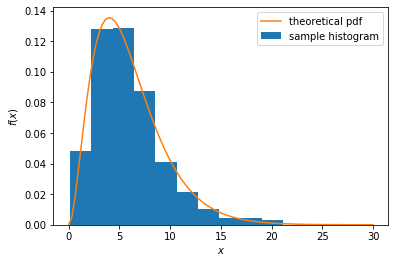

In [3]:
# выборка на 1000 элементов
sample = chi_rv.rvs(1000)
# на отрезке [0, 30] рисуется...
x = np.linspace(0,30,100)
# ...гистограмма
pdf = chi_rv.pdf(x)
plt.hist(sample, normed=True, label='sample histogram')
# ...и pdf
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


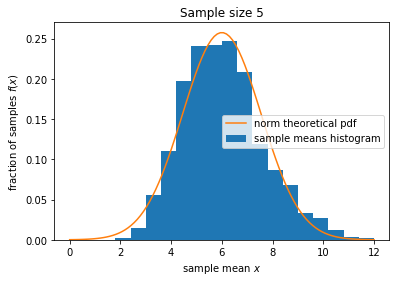

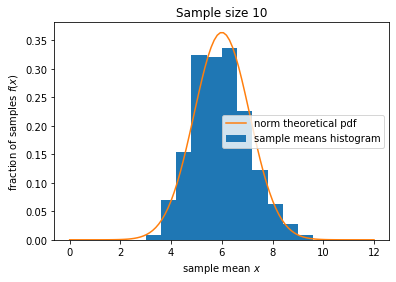

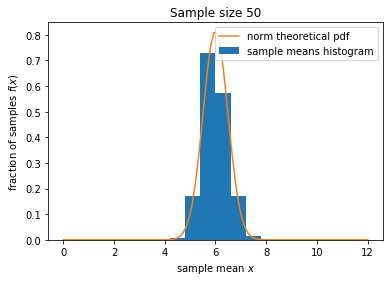

In [5]:
# для выборок размера n
for n in [5, 10, 50]:
    # вычисляется сдеднее из 1000 выборок
    sample_means = []
    for rvn in range(1000):
        sample_means.append(chi_rv.rvs(n).mean())
    # и вырисовывается на графике
    plt.hist(sample_means, 20, normed=True, range=[0, 12], label='sample means histogram')
    # вычисляется pdf нормального распределения с данными параметрами (каждый раз одинково)
    norm_rv = sts.norm(6, np.sqrt(2.*6./n))
    x = np.linspace(0, 12, 100)
    pdf = norm_rv.pdf(x)
    # и вырисовывается на графике
    plt.plot(x, pdf, label='norm theoretical pdf')
    # легенда графика
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

При увеличении размера выборки n, распределение средних значений начинает сходиться к 6, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет.
При этом расчетное нормальное распределение более менее совпадает с гистограммой, согласно закону больших чисел.